In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## Reading Dataset

In [2]:
bank = pd.read_csv('bank-full.csv', delimiter= ';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Performing EDA

In [3]:
bank.shape

(45211, 17)

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

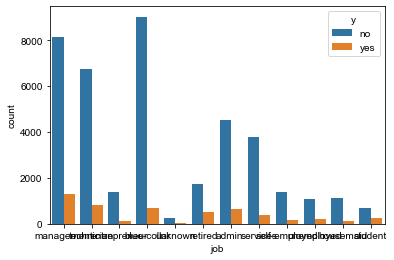

In [6]:
sns.countplot(x = 'job', hue= 'y', data= bank)
sns.set(rc={'figure.figsize': (20, 10)})

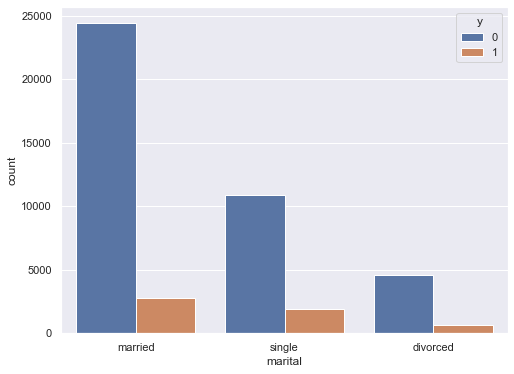

In [91]:
sns.countplot(x = 'marital', hue= 'y', data= bank)
sns.set(rc={'figure.figsize': (6, 4)})

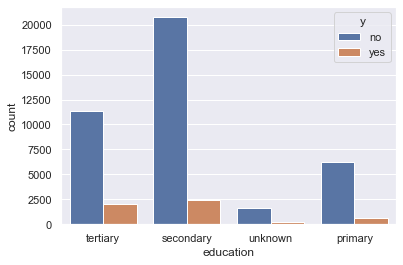

In [8]:
sns.countplot(x = 'education', hue= 'y', data= bank)
sns.set(rc={'figure.figsize': (8, 6)})

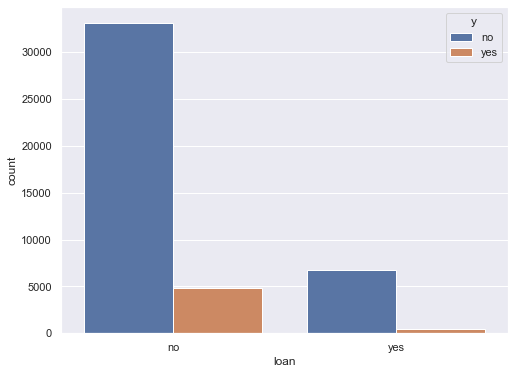

In [9]:
sns.countplot(x = 'loan', hue= 'y', data= bank)
sns.set(rc={'figure.figsize': (8, 6)})

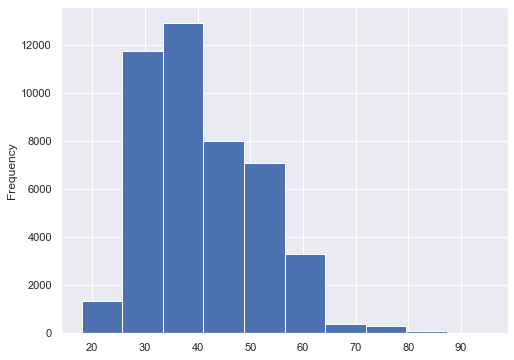

In [10]:
bank['age'].plot.hist()

## Data Wrangling

In [11]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [12]:
bank['default'].replace({'no': 0, 'yes': 1}, inplace= True)

In [13]:
bank['housing'].replace({'no': 0, 'yes': 1}, inplace= True)

In [14]:
bank['loan'].replace({'no': 0, 'yes': 1}, inplace= True)

In [15]:
bank['y'].replace({'no': 0, 'yes': 1}, inplace= True)

In [16]:
bank.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0


In [17]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(11), object(6)
memory usage: 5.9+ MB


In [18]:
job = pd.get_dummies(bank['job'], drop_first= True)
job.head(5)

,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1


In [19]:
marital = pd.get_dummies(bank['marital'], drop_first= True)
marital.head(5)

,married,single
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1


In [20]:
education = pd.get_dummies(bank['education'], drop_first= True)
education.head(5)

,secondary,tertiary,unknown
0,0,1,0
1,1,0,0
2,1,0,0
3,0,0,1
4,0,0,1


In [21]:
month = pd.get_dummies(bank['month'], drop_first= True)
month.head(5)

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0


In [22]:
poutcome = pd.get_dummies(bank['poutcome'], drop_first= True)
poutcome.head(5)

,other,success,unknown
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [23]:
bank_data = pd.concat([bank, job, marital, education, month, poutcome], axis= 1)
bank_data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,jul,jun,mar,may,nov,oct,sep,other,success,unknown
0,58,management,married,tertiary,0,2143,1,0,unknown,5,...,0,0,0,1,0,0,0,0,0,1
1,44,technician,single,secondary,0,29,1,0,unknown,5,...,0,0,0,1,0,0,0,0,0,1
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,...,0,0,0,1,0,0,0,0,0,1
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,...,0,0,0,1,0,0,0,0,0,1
4,33,unknown,single,unknown,0,1,0,0,unknown,5,...,0,0,0,1,0,0,0,0,0,1


In [24]:
bank_data.shape

(45211, 47)

In [25]:
bank_data.drop(['job', 'marital', 'education', 'contact', 'month', 'poutcome'], axis= 1, inplace= True)
bank_data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jul,jun,mar,may,nov,oct,sep,other,success,unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [26]:
y = bank['y']

In [27]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [28]:
bank_data.drop(['y'], axis=1, inplace= True)

In [29]:
bank_data_final = pd.concat([bank_data, y], axis=1)
bank_data_final.head(5)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jun,mar,may,nov,oct,sep,other,success,unknown,y
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,1,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,1,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,1,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,1,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,1,0


In [30]:
bank_data_final.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'blue-collar', 'entrepreneur',
       'housemaid', 'management', 'retired', 'self-employed', 'services',
       'student', 'technician', 'unemployed', 'unknown', 'married', 'single',
       'secondary', 'tertiary', 'unknown', 'aug', 'dec', 'feb', 'jan', 'jul',
       'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'other', 'success', 'unknown',
       'y'],
      dtype='object')

In [31]:
bank_data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            45211 non-null  int64
 1   default        45211 non-null  int64
 2   balance        45211 non-null  int64
 3   housing        45211 non-null  int64
 4   loan           45211 non-null  int64
 5   day            45211 non-null  int64
 6   duration       45211 non-null  int64
 7   campaign       45211 non-null  int64
 8   pdays          45211 non-null  int64
 9   previous       45211 non-null  int64
 10  blue-collar    45211 non-null  uint8
 11  entrepreneur   45211 non-null  uint8
 12  housemaid      45211 non-null  uint8
 13  management     45211 non-null  uint8
 14  retired        45211 non-null  uint8
 15  self-employed  45211 non-null  uint8
 16  services       45211 non-null  uint8
 17  student        45211 non-null  uint8
 18  technician     45211 non-null  uint8
 19  unem

In [32]:
X = bank_data_final.iloc[:, 0:40]
Y = bank_data_final.iloc[:, 40]


In [57]:
X.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,jul,jun,mar,may,nov,oct,sep,other,success,unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [59]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

## Splitting the Data for Train and Test

In [61]:
from sklearn.model_selection import train_test_split
train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

## Model Building

In [63]:
classifier = LogisticRegression()

In [90]:
classifier.fit(X_train, y_train)

C:\Users\rayad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
predictions = classifier.predict(X_test)

In [67]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Model Validation

In [68]:
from sklearn.metrics import classification_report

In [70]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.90      0.98      0.94     11969\n           1       0.63      0.22      0.33      1595\n\n    accuracy                           0.89     13564\n   macro avg       0.77      0.60      0.63     13564\nweighted avg       0.87      0.89      0.87     13564\n'

In [71]:
from sklearn.metrics import confusion_matrix

In [73]:
confusion_matrix(y_test, predictions)

array([[11760,   209],
       [ 1244,   351]], dtype=int64)

In [75]:
cm_score= (11760+351)/(11760+209+1244+351)*100
cm_score

89.28782070185785

In [81]:
classifier.predict_proba(X_test)[:,1]

array([0.00225035, 0.09537734, 0.04776855, ..., 0.02765727, 0.04643712,
       0.03450271])

In [77]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

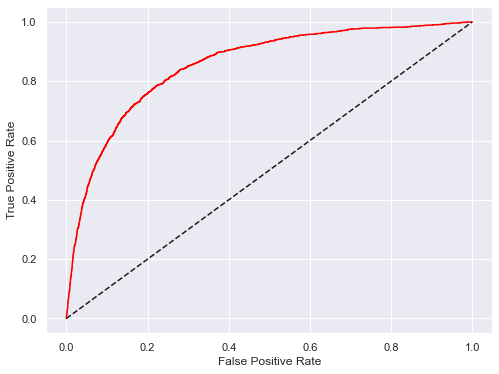

In [87]:
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba (X_test)[:,1])

auc = roc_auc_score(y_test, predictions)

plt.plot(fpr, tpr, color = 'red', label = 'Logistic Model (area = %0.2f)'%auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()



In [88]:
auc

0.6013004598347194